In [77]:
# !git clone https://github.com/AshishJangra27/GeeksforGeeks-Articles-Data-Analysis

import pandas as pd

df = pd.read_csv('/content/GeeksforGeeks-Articles-Data-Analysis/articles.csv')
df.head()

,title,author_id,last_updated,link,category
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy


### 1. Exploratory Data Analysis
##### 1.1) Checking null values

In [78]:
df.isnull().sum()

title            0
author_id       19
last_updated    18
link             0
category         0
dtype: int64

##### 1.2) Dealing with null values if there is any

In [79]:
df.dropna(inplace=True)

df.drop_duplicates(inplace = True)

df.isnull().sum()

title           0
author_id       0
last_updated    0
link            0
category        0
dtype: int64

##### 1.3) Exploring 'category' column

<Axes: >

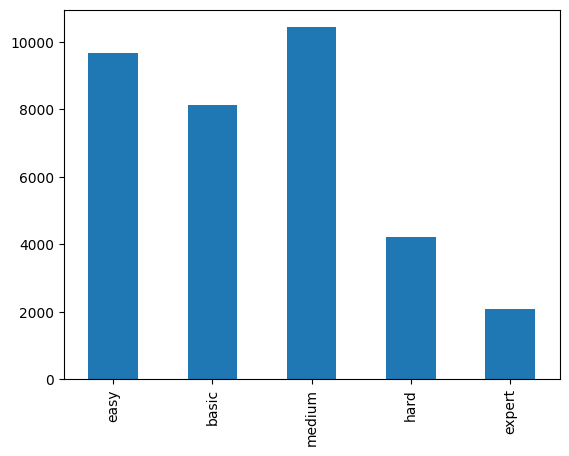

In [80]:
df['category'].value_counts().loc[['easy', 'basic', 'medium','hard','expert']].plot(kind = 'bar')

##### 1.4) Exploring 'link' column

In [81]:
df['link'].nunique()

34533

##### 1.5) Exploring 'last_updated' column

In [82]:
df['last_updated'].value_counts()

28 Jun, 2021    1283
24 Nov, 2021     155
30 Jun, 2021     151
21 May, 2021     151
11 Aug, 2021     140
                ... 
07 Jun, 2016       1
10 Jul, 2016       1
04 May, 2017       1
01 Sep, 2016       1
12 May, 2015       1
Name: last_updated, Length: 1962, dtype: int64

##### 1.6) Exploring 'author_id' column

In [83]:
df['author_id'].value_counts()

GeeksforGeeks        11949
ManasChhabra2          316
Striver                265
manjeet_04             246
Chinmoy Lenka          192
                     ...  
Alok_Kumar_Singh         1
aaaanchakure             1
bohramayank4u            1
swapnilbutia05           1
sandeep tadepalli        1
Name: author_id, Length: 5589, dtype: int64

### 2. Data Cleaning
##### 2.1) Dates | East, Medium

In [84]:
df = df[df['last_updated'] != 'Easy']
df = df[df['last_updated'] != 'Medium']
df = df[df['last_updated'] != 'Basic']
df = df[df['last_updated'] != 'Hard']

df.head()

,title,author_id,last_updated,link,category
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy


##### 2.2) Split dates based on day, month and year

In [85]:
date   = []
month = []
year  = []

for i in df['last_updated']:
  i = i.replace(',','')
  date.append(int(i.split(' ')[0]))
  month.append(i.split(' ')[1])
  year.append(int(i.split(' ')[2]))

df['date']   = date
df['month'] = month
df['year']  = year
df.head()

,title,author_id,last_updated,link,category,date,month,year
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,21,Feb,2022
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,20,Feb,2022
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,17,Feb,2022
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,17,Feb,2022
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,21,Feb,2022


In [86]:
# prompt: code to find the day on a specific date

import datetime

def find_day(date):
  date_obj = datetime.datetime.strptime(date, '%d %b %Y')
  day = date_obj.strftime('%A')
  return day

df['day'] = [find_day(date.replace(',','')) for date in df['last_updated']]
df.head()

,title,author_id,last_updated,link,category,date,month,year,day
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,21,Feb,2022,Monday
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,20,Feb,2022,Sunday
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,17,Feb,2022,Thursday
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,17,Feb,2022,Thursday
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,21,Feb,2022,Monday


### 3. Data Analysis
##### 3.1) Article distribution in each category

<Axes: xlabel='category'>

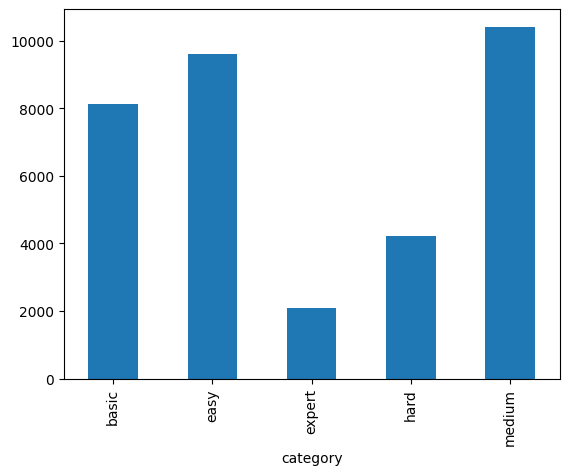

In [90]:
df.groupby(by = 'category')['title'].count().plot(kind = 'bar')

##### 3.2) If there is any relation between number of article published and date?

<Axes: xlabel='date'>

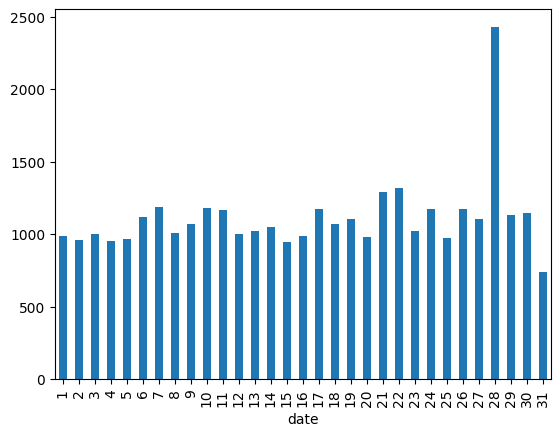

In [93]:
df.groupby(by = 'date')['title'].count().plot(kind = 'bar')

##### 3.3) If there is any relation between number of article published and month?

<Axes: xlabel='month'>

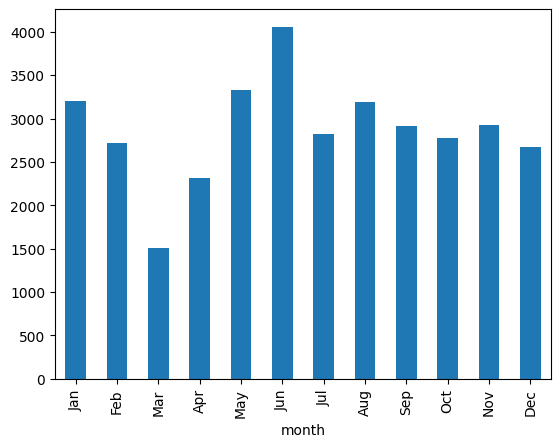

In [95]:
df.groupby(by = 'month')['title'].count().loc[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].plot(kind = 'bar')

##### 3.4) If there is any relation between number of article published and year?

##### 3.5) In the history of GFG, which day has most number of articles published?

##### 3.6) Top 5 writers for award who has given maximum contribution to gfg

##### 3.7) Which language has most number of articles published among C, C++, Java and Python?